In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aasheesh200/framingham-heart-study-dataset", path = 'framingham.csv')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [33]:
df = pd.read_csv(path)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [34]:
# Cols with null values
df.columns[df.isna().any()].tolist()
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [35]:
# Clear out null values
df.dropna(inplace=True)

In [36]:
# Task 1: Pick subjects with and without lifestyle intervention (can be simulated from categorical variables like smoking, physical activity, etc.).

In [37]:
# Lets assume that people who dont are not smoking currently are under intervention
df_with_intervention = df[(df['currentSmoker'] == 0)]
df_without_intervention = df[(df['currentSmoker'] != 0)]

In [38]:
# Task: Calculate the observed difference in mean systolic BP.

min_size = min(len(df_with_intervention), len(df_without_intervention))

# Drop a few rows from without in. people to make n equal
df_with_intervention = df_with_intervention.sample(n=min_size, random_state=42)
df_without_intervention = df_without_intervention.sample(n=min_size, random_state=42)

mean_bp_a = df_with_intervention['sysBP'].mean()
mean_bp_b = df_without_intervention['sysBP'].mean()

print(f'Sys BP of intervened group: {mean_bp_a}')
print(f'Sys BP of non-intervened group: {mean_bp_b}')

Sys BP of intervened group: 135.2356064840693
Sys BP of non-intervened group: 129.33622135271102


In [39]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
import matplotlib.pyplot as plt

# 1. Compute effect size (Cohen's d)
mean_1 = df_with_intervention['sysBP'].mean()
mean_2 = df_without_intervention['sysBP'].mean()

std_1 = df_with_intervention['sysBP'].std()
std_2 = df_without_intervention['sysBP'].std()

pooled_std = np.sqrt((std_1 ** 2 + std_2 ** 2) / 2)
effect_size = (mean_1 - mean_2) / pooled_std
print("Effect size (Cohen's d):", effect_size)


Effect size (Cohen's d): 0.26991178712815356


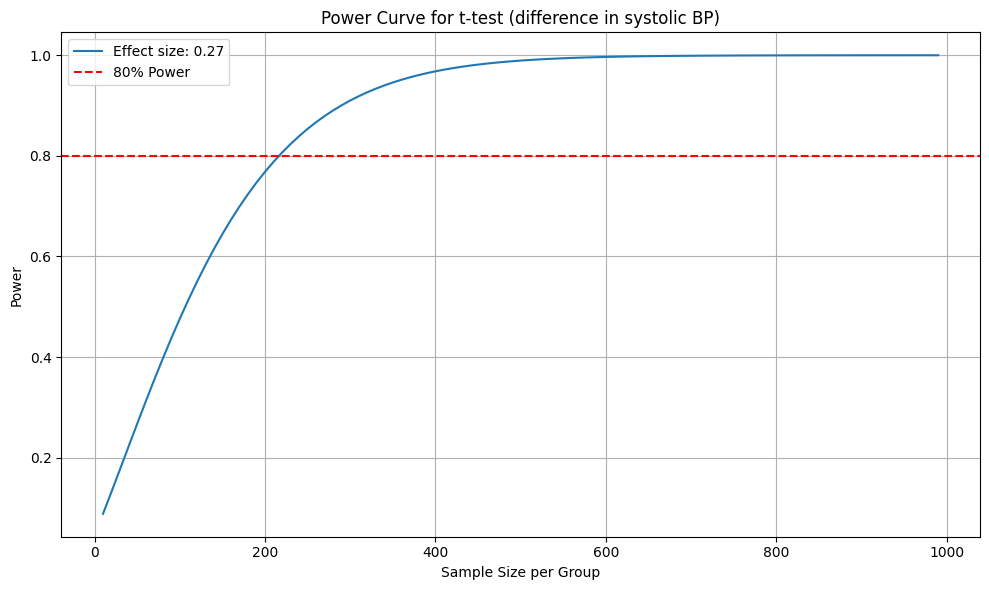

In [40]:
# Power curve setup
power_analysis = TTestIndPower()
sample_sizes = np.arange(10, 1000, 10)
power_values = power_analysis.power(effect_size=abs(effect_size),
                                    nobs1=sample_sizes,
                                    alpha=0.05,
                                    ratio=1.0,
                                    alternative='two-sided')

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, power_values, label=f'Effect size: {round(abs(effect_size), 3)}')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Power')
plt.xlabel('Sample Size per Group')
plt.ylabel('Power')
plt.title('Power Curve for t-test (difference in systolic BP)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
